### **Загрузка библиотек и датасета**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.91M/2.91M [00:00<00:00, 47.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2


In [ ]:
df=pd.read_csv('/root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2/healthcare_dataset.csv')

In [ ]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


###**EDA**

**Name**:<font color = "darkblue">(***имя пациента согласно записям в истории болезни***)</font> This column represents the name of the patient associated with the healthcare record.
<br>**Age**: <font color = "darkblue">(***Возараст пациента на дату поступления, в годах***)</font> The age of the patient at the time of admission, expressed in years.
<br>**Gender**: <font color = "darkblue">(***пол пациента: Male - муж, Female - жен***) </font> Indicates the gender of the patient, either "Male" or "Female."
<br>**Blood Type**: <font color = "darkblue">(***Группа крови пациента**) </font> The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
<br>**Medical Condition**: <font color = "darkblue">(***Медицинское состояние пациента, например, гипертония, астма, т.д.***)</font> This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
<br>**Date of Admission**: <font color = "darkblue">(***Дата поступления пациента***)</font> The date on which the patient was admitted to the healthcare facility.
<br>**Doctor:** <font color = "darkblue"> (***Имя лечащего врача***) </font> The name of the doctor responsible for the patient's care during their
admission.
<br>**Hospital**: <font color = "darkblue">(***Лечебное учреждение, в которое поступил пациент***)</font> Identifies the healthcare facility or hospital where the patient was admitted.
<br>**Insurance Provider:** <font color = "darkblue">(***Страховая компания пациента. Одна из представленных:"Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," и "Medicare" ***)</font> This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
<br>**Billing Amount**: <font color = "darkblue">(***Сумма счета за лечение. Число с дробной частью (float)***)</font> The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
<br>**Room Number:** <font color = "darkblue">(***Номер палаты, в которй пациент проживал во время лечения***)</font> The room number where the patient was accommodated during their admission.
<br>**Admission Type**: <font color = "darkblue">(***Вид приема, отражающий осбтоятельства поступления пациента: Скорый, выборочный, срочный***)</font> Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
<br>**Discharge Date**: <font color = "darkblue">(***Дата выписки пациента. Основана на дате поступления пациента и случаном кол-ве дней в пределах диапазона реалистичного срока лечения***) </font> The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
<br>**Medication**: <font color = "darkblue">(***Медикаменты, которые были выписаны пациенту или принимались им во время лечения. Такие как Аспирин,Ибупрофен, пеницилин, парацетамол, липитор***)</font> Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
<br>**Test Results**:<font color = "darkblue">(***Результаты теста, который проводился во время приема пациента. Возможные варианты: Нормальный, Ненормальный, Неокончательный***)</font>  Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

<br><font color = "forestgreen" size = 4>**Test results**</font> **- целевая переменная**
<br><font color = "red">**У этой ЦП три значения**</font>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['month_of_Admission'] = pd.to_datetime(df['Date of Admission'].dt.to_period('M').astype(str) + "-01")
df['month_of_Discharge'] = pd.to_datetime(df['Discharge Date'].dt.to_period('M').astype(str) + "-01")

In [ ]:
#pandas.DatetimeIndex.dayofweek пронумерует по этому правилу: The day of the week with Monday=0, Sunday=6. Поэтому для привычного восприятия (по росс.стандартам) прибавлю 1, тогда Пн = 1, Вс = 7
df['Admission_weekDay'] = df['Date of Admission'].dt.dayofweek + 1
df['Discharge_weekDay'] = df['Discharge Date'].dt.dayofweek + 1

In [ ]:
dayofweek_names = dict({1: "Monday",
                         2: "Tuesday",
                         3: "Wednesday" ,
                         4: "Thursday",
                         5: "Friday",
                         6: "Saturday",
                         7: "Sunday"})

In [ ]:
df['Admission_Day_names'] = df['Admission_weekDay'].map(dayofweek_names)
df['Discharge_Day_names'] = df['Discharge_weekDay'].map(dayofweek_names)

In [ ]:
df['treatment_period'] = ((df['Discharge Date'] - df['Date of Admission'])/np.timedelta64(1, 'D')).astype('int64')

In [ ]:
df['Billing Amount'] = np.round(df['Billing Amount'],0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 55500 non-null  object        
 1   Age                  55500 non-null  int64         
 2   Gender               55500 non-null  object        
 3   Blood Type           55500 non-null  object        
 4   Medical Condition    55500 non-null  object        
 5   Date of Admission    55500 non-null  datetime64[ns]
 6   Doctor               55500 non-null  object        
 7   Hospital             55500 non-null  object        
 8   Insurance Provider   55500 non-null  object        
 9   Billing Amount       55500 non-null  int64         
 10  Room Number          55500 non-null  int64         
 11  Admission Type       55500 non-null  object        
 12  Discharge Date       55500 non-null  datetime64[ns]
 13  Medication           55500 non-

> посмотрим сколько уникальных значений в колонке с врачами и пациентами. Есть предположение, что очень большое кол-во и в анализе эти данные будут мешать


In [ ]:
print("Врачей: ", df['Doctor'].nunique(), '\n', "Пациентов: ", df['Name'].nunique())

Врачей:  40341 
 Пациентов:  49992


Очень много уникальных имен врачей и пациентов, и если нет необходимости провести анализ по конкретным врачам, пациентам, то эти колонки лучше убрать из датасета на этапе подготовки к ML

In [ ]:
print("Период, за который предстваленны данные по поступлению пациентов: от ", df['Date of Admission'].min(), " до ", df['Date of Admission'].max())
print("Период, за который предстваленны данные по выписке пациентов: от ", df['Discharge Date'].min(), " до ", df['Discharge Date'].max())

Период, за который предстваленны данные по поступлению пациентов: от  2019-05-08 00:00:00  до  2024-05-07 00:00:00
Период, за который предстваленны данные по выписке пациентов: от  2019-05-09 00:00:00  до  2024-06-06 00:00:00


<font size = 4.5> **NB:** Заполение пропусков, кодирование категориальных признаков, удаление выбросов, удаление лишних столбцов буду производить на этапе подготовки данных для ML </font>

In [ ]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Name,55500,49992,DAvId muNoZ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,55500.0,NaN,NaN,NaN,51.539459,13.0,35.0,52.0,68.0,89.0,19.602454
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,55500,NaN,NaN,NaN,2021-11-01 01:02:22.443243008,2019-05-08 00:00:00,2020-07-28 00:00:00,2021-11-01 00:00:00,2023-02-03 00:00:00,2024-05-07 00:00:00,NaN
Doctor,55500,40341,Michael Smith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,55500,39876,LLC Smith,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.314811,-2008.0,13241.0,25538.5,37820.25,52764.0,14211.457266


> т.к. есть данные с большим разбросом значений, я бы посмотрела на график плотности распределения значений. Возможно, для EDA было бы лучше их сгруппировать в подгруппы. Например, возраст пациентов, сумма счета, срок лечения

In [ ]:
num_cols = []
str_cols = []

all_cols = df.dtypes.to_dict()

for cols in all_cols:
  if all_cols[cols] in ('int64', 'float64'):
    num_cols.append(cols)
  else:
    str_cols.append(cols)
print("numeric: ", num_cols, '\n', "string (object): ", str_cols)

numeric:  ['Age', 'Billing Amount', 'Room Number', 'treatment_period'] 
 string (object):  ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results', 'month_of_Admission', 'month_of_Discharge', 'Admission_weekDay', 'Discharge_weekDay', 'Admission_Day_names', 'Discharge_Day_names']


In [ ]:
print(df['Age'].nunique(), df['Billing Amount'].nunique())

77 31657


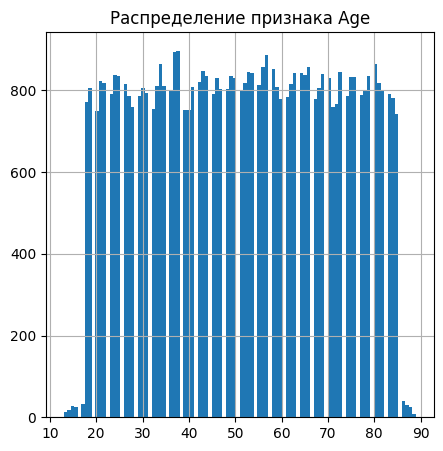

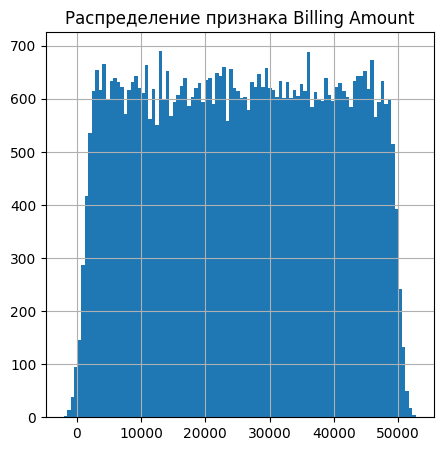

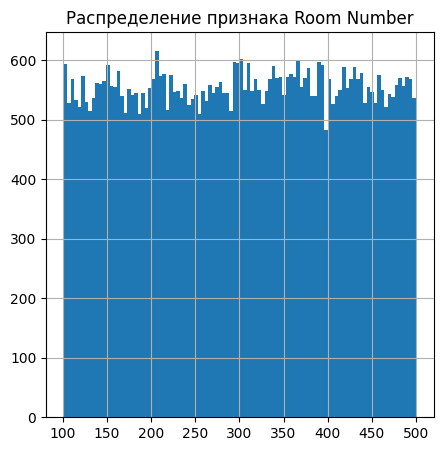

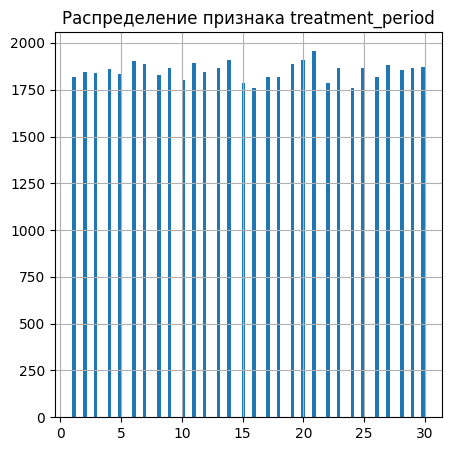

In [ ]:
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col}')
    #sns.distplot(df[col])
    df[col].hist(bins = 100)

> Числовые признаки имеют равномерное распределение, т.е. нет перевеса на какое-то определенное значение. В случае с Age из этой картины выбиваются экстремумы - до 15-18 и после 85 лет. Эти возраста посмотрим подробнее

<Axes: >

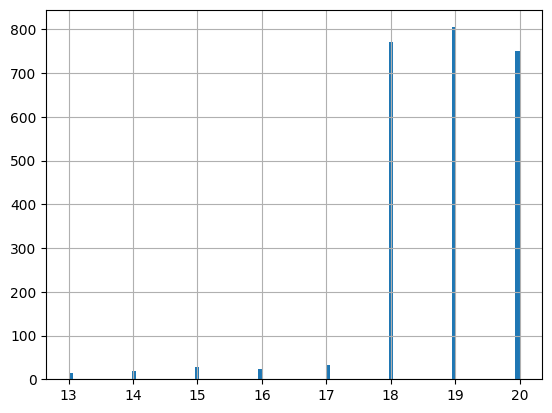

In [ ]:
df[df['Age']<=20]['Age'].hist(bins = 100)

In [ ]:
df[df['Age'] < 18]['Age'].value_counts()

,count
Age,
17,32
15,28
16,24
14,18
13,14


<Axes: >

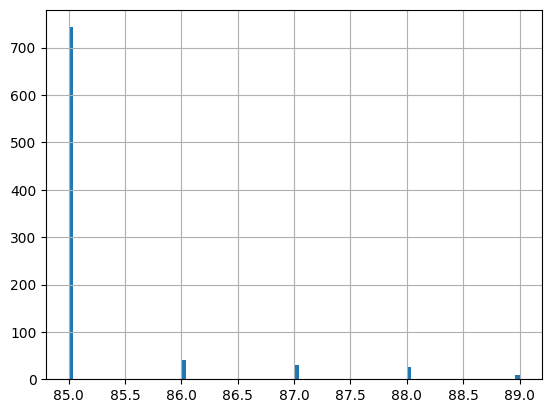

In [ ]:
df[df['Age']>=85]['Age'].hist(bins = 100)

In [ ]:
df[df['Age']>85]['Age'].value_counts()

,count
Age,
86,41
87,31
88,25
89,8


>> Пациентов до 18 и после 85 можно включить в отдельные подгруппы

In [ ]:
df['Age_groups'] = df['Age'].apply(lambda x: '<18' if x < 18
                                   else '18-25' if x in range(18,26)
                                   else '26-35' if x in range(26,36)
                                   else '36-45' if x in range(36,46)
                                   else '46-55' if x in range(46,56)
                                   else '56-65' if x in range(56,66)
                                   else '66-75' if x in range(66,76)
                                   else '76-85' if x in range(76,86)
                                   else '85<')

In [ ]:
df[df['Age_groups'] == '76-85']['Age'].unique() #проверка

array([76, 82, 78, 81, 77, 84, 83, 80, 79, 85])

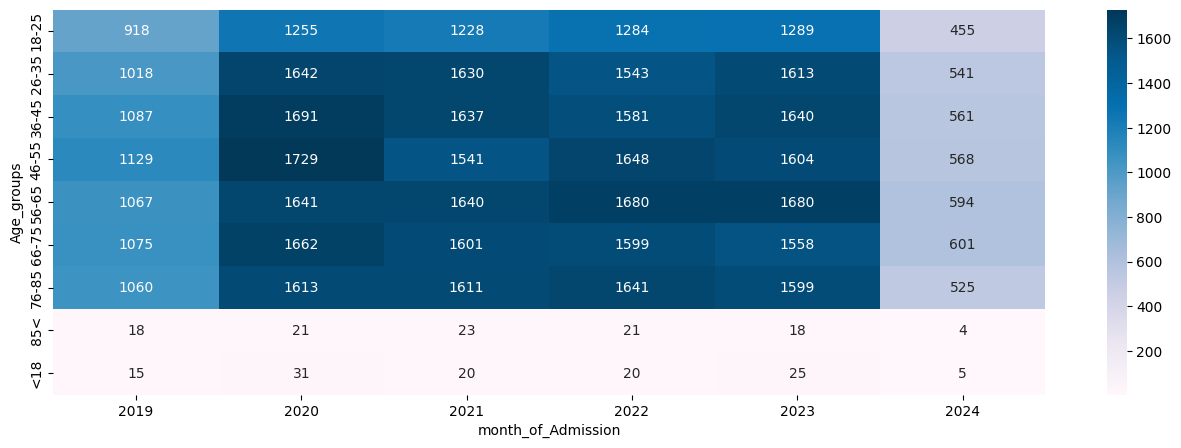

In [ ]:
Ages_Y = pd.pivot_table(df, values='Name', columns=df['month_of_Admission'].dt.to_period('Y').astype(str), index=['Age_groups'], aggfunc= "count")
Ages_Y.fillna(0)

plt.figure(figsize=(16,5))
sns.heatmap(Ages_Y, annot=True,
                fmt='g', cmap='PuBu')
plt.show()

На большом периоде неудобно смотреть распределение по месяцам, но это нужно сделать, чтобы посмотреть на наличие сезонности. Поэтому возьму период в 2 года - 2022 и 2023 гг. Они ближе к текущему году, по ним высокие показатели по кол-ву пациентов (как и в 2020 и 2021)


In [ ]:
Ages_M = pd.pivot_table(df[(df['month_of_Admission'] >= '2022-01-01') & (df['month_of_Admission'] <= '2023-12-01')] , values='Name', columns= ['month_of_Admission'] , index = ['Age_groups'], aggfunc= "count")
Ages_M.fillna(0)
Ages_M

month_of_Admission,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
Age_groups,,,,,,,,,,,,,,,,,,,,,
18-25,91.0,106.0,115.0,98.0,96.0,115.0,118.0,133.0,105.0,111.0,...,97.0,113.0,91.0,118.0,113.0,116.0,105.0,107.0,109.0,117.0
26-35,133.0,97.0,131.0,117.0,113.0,150.0,133.0,141.0,125.0,125.0,...,142.0,123.0,142.0,140.0,140.0,129.0,129.0,132.0,136.0,138.0
36-45,132.0,124.0,139.0,142.0,112.0,136.0,124.0,115.0,145.0,145.0,...,141.0,134.0,132.0,135.0,125.0,155.0,148.0,131.0,128.0,130.0
46-55,129.0,111.0,153.0,123.0,145.0,158.0,130.0,146.0,115.0,150.0,...,116.0,132.0,157.0,146.0,124.0,162.0,133.0,142.0,125.0,119.0
56-65,161.0,110.0,127.0,123.0,139.0,155.0,153.0,149.0,134.0,144.0,...,143.0,135.0,147.0,138.0,147.0,128.0,141.0,137.0,124.0,153.0
66-75,169.0,108.0,135.0,134.0,130.0,116.0,151.0,122.0,133.0,121.0,...,128.0,132.0,144.0,142.0,131.0,136.0,112.0,128.0,122.0,125.0
76-85,152.0,113.0,137.0,142.0,153.0,134.0,139.0,144.0,159.0,113.0,...,150.0,124.0,111.0,141.0,136.0,140.0,147.0,119.0,135.0,134.0
85<,2.0,5.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,NaN,2.0,1.0,4.0,2.0,1.0,2.0
<18,NaN,3.0,NaN,NaN,2.0,4.0,1.0,3.0,1.0,1.0,...,4.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,3.0


Text(0.5, 1.0, 'Количество пациентов по месяцам в 22-24 гг')

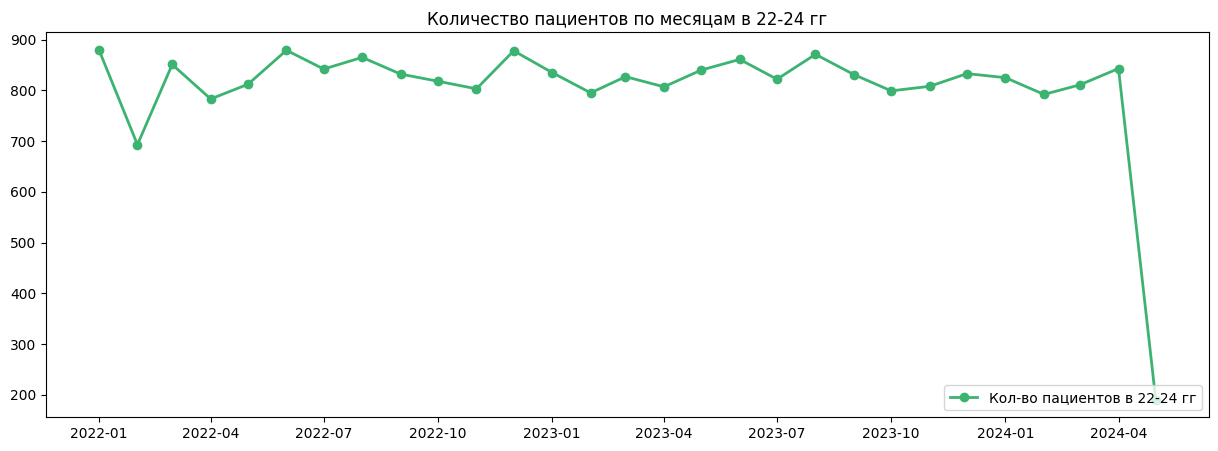

In [ ]:
plt.figure(figsize = (15,5))
plt.plot('month_of_Admission',
         'Name',
         data = df[(df['month_of_Admission'] >= '2022-01-01') & (df['month_of_Admission'] <= df['month_of_Admission'].max())].groupby(['month_of_Admission'])['Name'].nunique().reset_index(),
         color = "mediumseagreen",
         linewidth = 2,
         marker = 'o',
         label = "Кол-во пациентов в 22-24 гг")
plt.legend(loc = 'lower right')
plt.title("Количество пациентов по месяцам в 22-24 гг")

Сезонности нет, если смотреть на пациентов без дополнительной разбивки на группы. На графике виден спад в феврале 2022, но не такой значительный - ок.22%

In [ ]:
df[df['month_of_Admission']=='2024-05-01']['Name'].nunique()

190

In [ ]:
df['Date of Admission'].max()

Timestamp('2024-05-07 00:00:00')

In [ ]:
pd.pivot_table(df , values='Name', columns= df['month_of_Admission'].dt.to_period('Y') , index = df['month_of_Admission'].dt.month, aggfunc= "count").fillna(0).reset_index().drop(columns = {'month_of_Admission'})

month_of_Admission,2019,2020,2021,2022,2023,2024
0,0.0,950.0,933.0,969.0,931.0,909.0
1,0.0,881.0,837.0,777.0,880.0,880.0
2,0.0,937.0,969.0,938.0,922.0,906.0
3,0.0,924.0,870.0,880.0,898.0,946.0
4,686.0,978.0,903.0,892.0,927.0,213.0
5,907.0,935.0,926.0,970.0,961.0,0.0
6,957.0,1007.0,978.0,951.0,919.0,0.0
7,1001.0,1014.0,894.0,955.0,968.0,0.0
8,936.0,904.0,867.0,919.0,920.0,0.0
9,1013.0,962.0,893.0,912.0,898.0,0.0


>> Май в 2019 и в 2024 неполные месяцы (данные в 2019 с 8 мая, в 2024 по 7 мая)

>> **Посмотрим есть ли сезонность по типам представленных заболеваний**

Text(0.5, 1.0, 'Количество пациентов по месяцам в 22-24 гг')

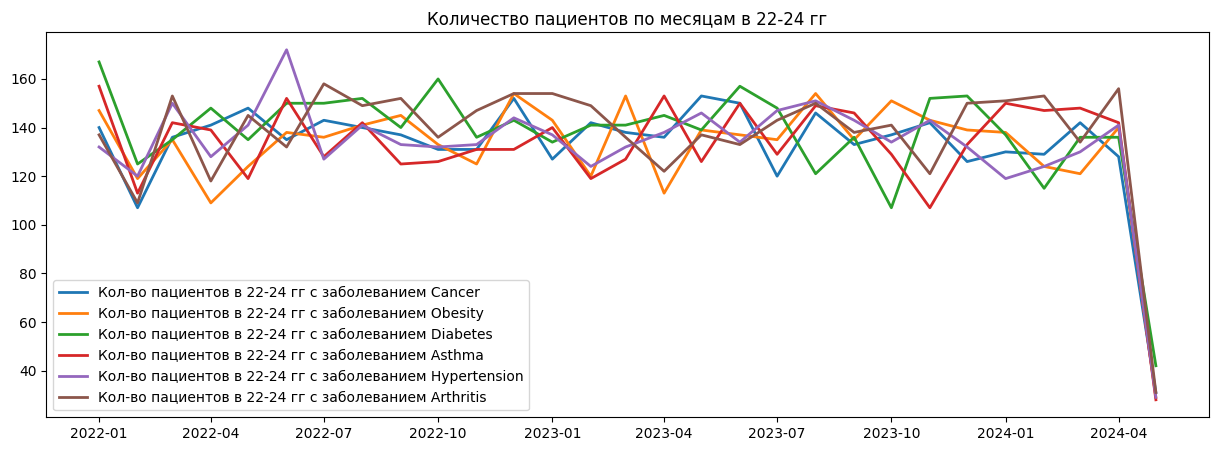

In [ ]:
deseases = list(df['Medical Condition'].unique())

plt.figure(figsize = (15,5))
for x in deseases:
  plt.plot(
         'month_of_Admission',
          'Name',
          data = df[(df['month_of_Admission'] >= '2022-01-01') & (df['month_of_Admission'] <= df['month_of_Admission'].max()) & (df['Medical Condition']== x)].groupby(['month_of_Admission'])['Name'].nunique().reset_index(),
          linewidth = 2,
          #marker = 'o',
          label = f'Кол-во пациентов в 22-24 гг с заболеванием {x}')
  plt.legend(loc = 'lower left')
plt.title("Количество пациентов по месяцам в 22-24 гг")

>> как-будто ярко выаженной сезонности по типам болезней нет. Можно наблюдать снижение кол-ва пациентов с ожирением в начале весны (апрель) и увеличение в зимние месяцы.

>> **Как распределяются заболевания по возрастным группам**

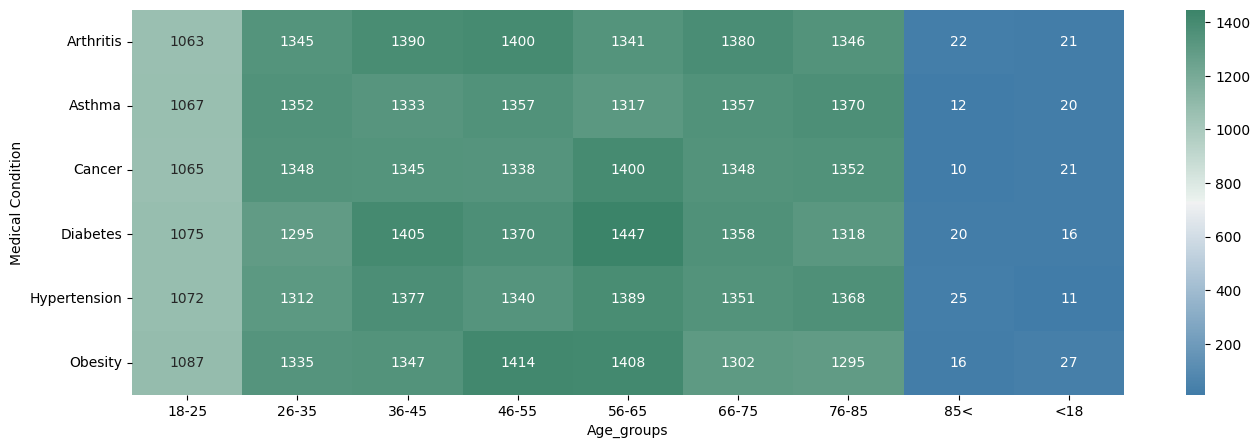

In [ ]:
#sns.color_pallete('colorblind')
plt.figure(figsize=(16,5))
sns.heatmap(
    pd.pivot_table(df, values = 'Name', columns = df['Age_groups'], index = df['Medical Condition'], aggfunc = "count").fillna(0),
    annot=True,
    fmt='g',
    cmap = sns.diverging_palette(240, 155, as_cmap=True)
    #cmap = sns.color_palette("coolwarm", as_cmap=True)
    #cmap = sns.color_palette("cubehelix", as_cmap=True)
    #cmap = sns.color_palette("magma", as_cmap=True)
    #cmap = sns.color_palette('pastel')
    )
plt.show()

>> Посмотрим %-е соотношение от всего кол-ва поступивших пациентов

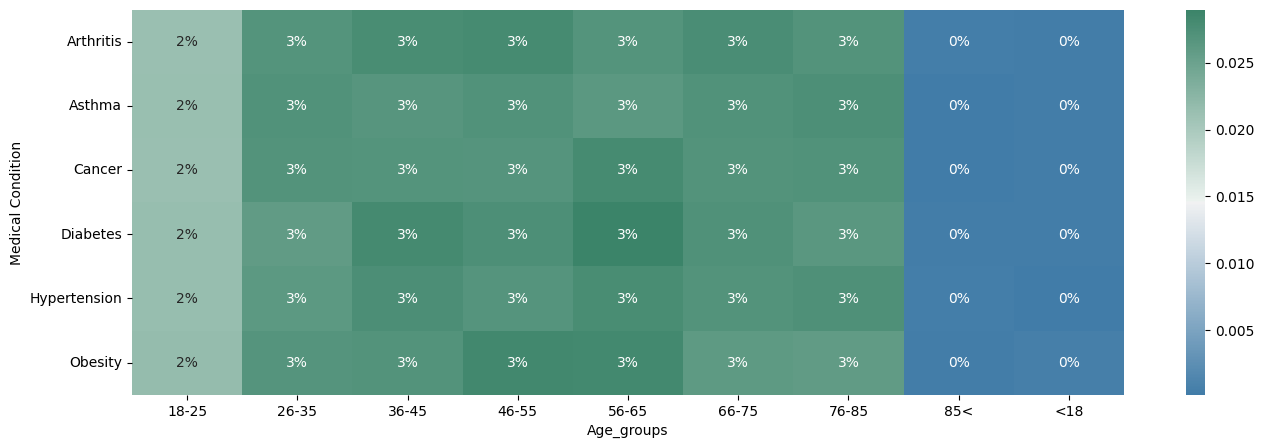

In [ ]:
#https://seaborn.pydata.org/tutorial/color_palettes.html

plt.figure(figsize=(16,5))
sns.heatmap(
      pd.pivot_table(df, values ='Name', columns = ['Age_groups'], index = ['Medical Condition'], aggfunc = "count").fillna(0)/df['Name'].nunique(),
      annot=True,
      fmt='.0%',
      cmap = sns.diverging_palette(240, 155, as_cmap=True)
      #cmap = sns.color_palette("coolwarm", as_cmap=True)
      #cmap = sns.color_palette("cubehelix", as_cmap=True)
      #cmap = sns.color_palette("magma", as_cmap=True)
      #cmap = sns.color_palette('pastel')
      )
plt.show()

>> на этом этапе как-будто нет четкой связи между возврастом и заболеванием. Можно сказать, что меньше обращаются в клиники пациенты от 18 до 25.
и в отдельную группу выделим пациентов от до 18 и после 85. Возможно, пациенты до 18 не страдают перечисленными болезнями, либо обращаются в другие (детские) больницы


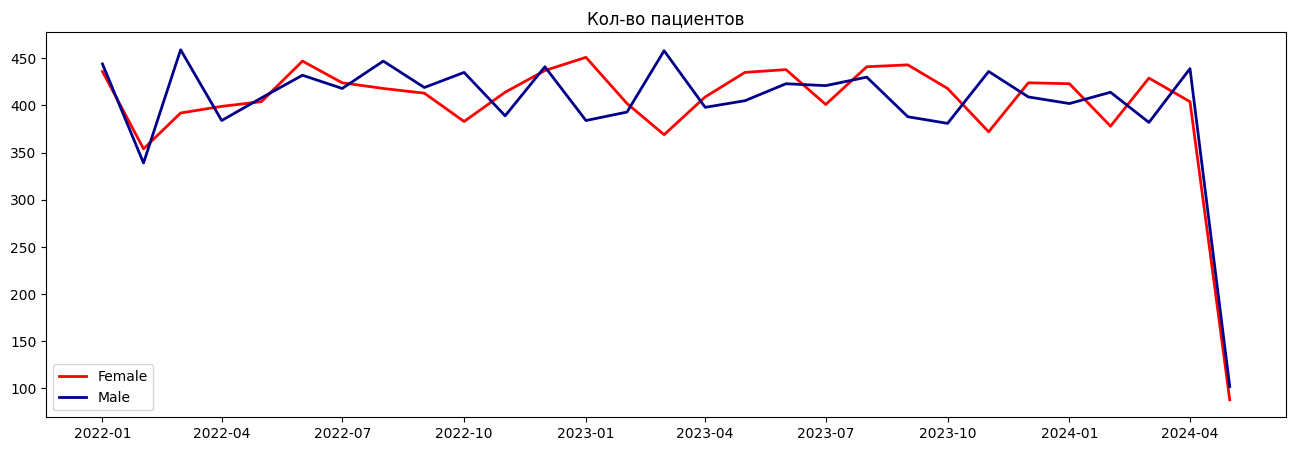

In [ ]:
gender = sorted(list(df['Gender'].unique()))
colors = list(['red','darkblue'])
dic = dict(zip(gender,colors))

plt.figure(figsize = (16,5))
for k,v in dic.items():
  plt.plot('month_of_Admission', 'Name', data = df[(df['Date of Admission']>='2022-01-01') & (df['Gender']==k)].groupby(['month_of_Admission'])['Name'].nunique().reset_index(), linewidth = 2, label = k, color = v)
plt.legend(loc = 'lower left')
plt.title("Кол-во пациентов")
plt.show()

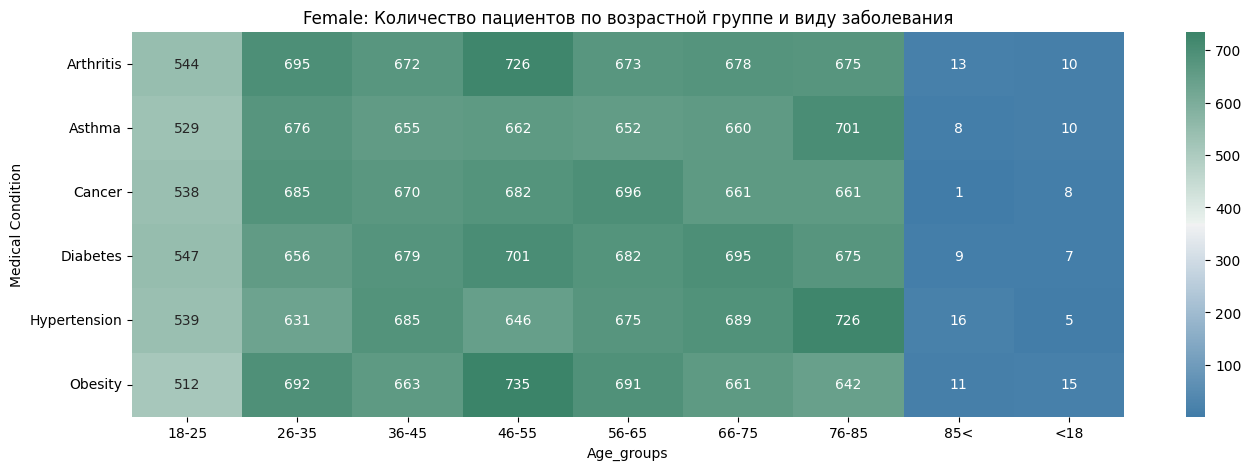

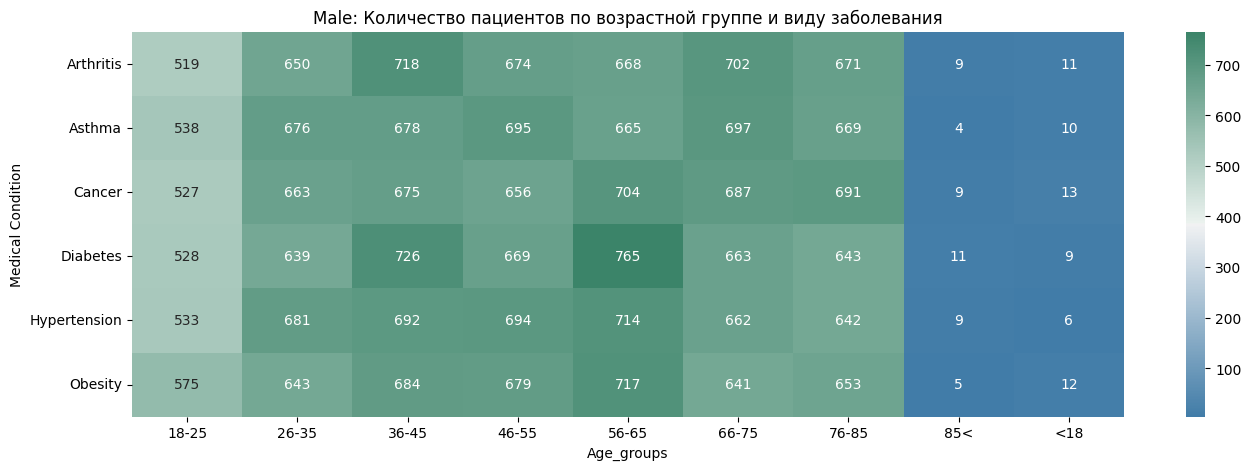

In [ ]:
#gender= list(df['Gender'].unique())

for x in gender:
  for y in range(1,len(gender)):
    plt.figure(figsize=(16,5))
    sns.heatmap(
        pd.pivot_table(df[df['Gender']==x], values = 'Name', columns = df['Age_groups'], index = df['Medical Condition'], aggfunc = "count").fillna(0),
        annot=True,
        fmt='g',
        cmap = sns.diverging_palette(240, 155, as_cmap=True)
        )
    plt.title(f"{x}: Количество пациентов по возрастной группе и виду заболевания")
    plt.show()

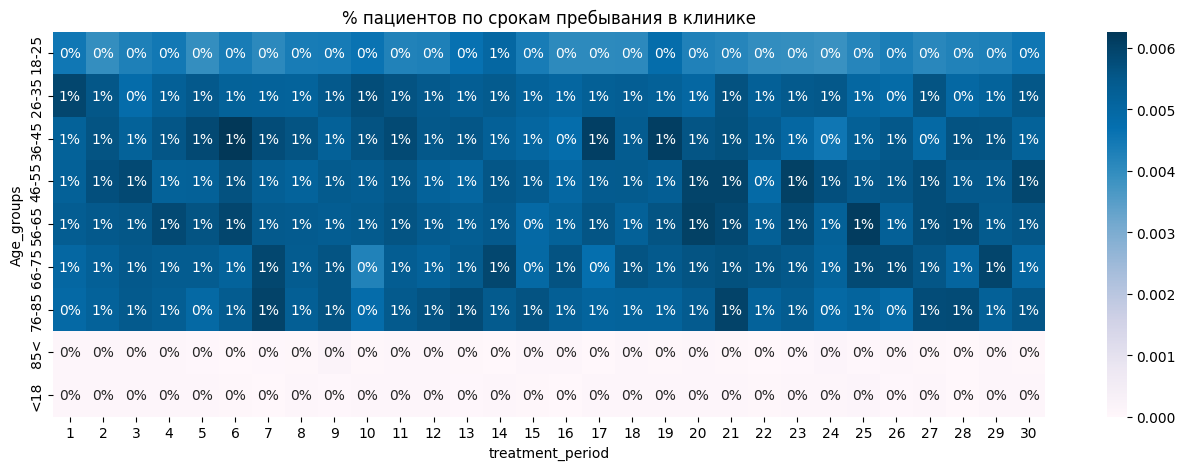

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(
    pd.pivot_table(df, values = 'Name', index = df['Age_groups'], columns = df['treatment_period'], aggfunc = "count").fillna(0)/df['Name'].nunique(),
    annot=True,
    fmt='.0%',
    cmap = "PuBu"
    #cmap = sns.diverging_palette(240, 155, as_cmap=True)
    #cmap = sns.color_palette("coolwarm", as_cmap=True)
    #cmap = sns.color_palette("cubehelix", as_cmap=True)
    #cmap = sns.color_palette("magma", as_cmap=True)
    #cmap = sns.color_palette('pastel')
    )
plt.title("% пациентов по срокам пребывания в клинике")
plt.show()

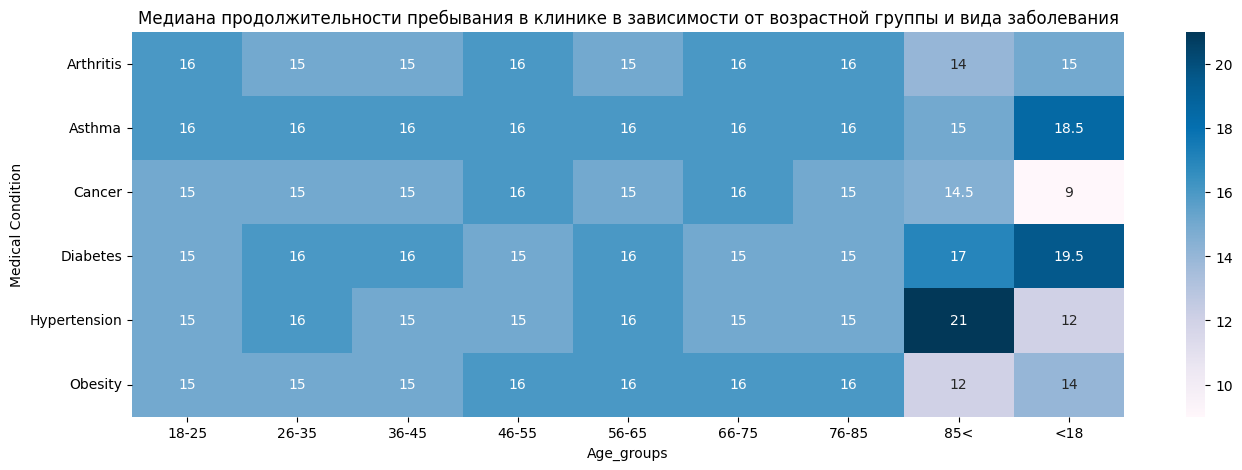

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(
    pd.pivot_table(df, values = 'treatment_period', columns = df['Age_groups'], index = df['Medical Condition'], aggfunc = "median"),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    #cmap = sns.diverging_palette(240, 155, as_cmap=True)
    #cmap = sns.color_palette("coolwarm", as_cmap=True)
    #cmap = sns.color_palette("cubehelix", as_cmap=True)
    #cmap = sns.color_palette("magma", as_cmap=True)
    #cmap = sns.color_palette('pastel')
    )
plt.title("Медиана продолжительности пребывания в клинике в зависимости от возрастной группы и вида заболевания")
plt.show()

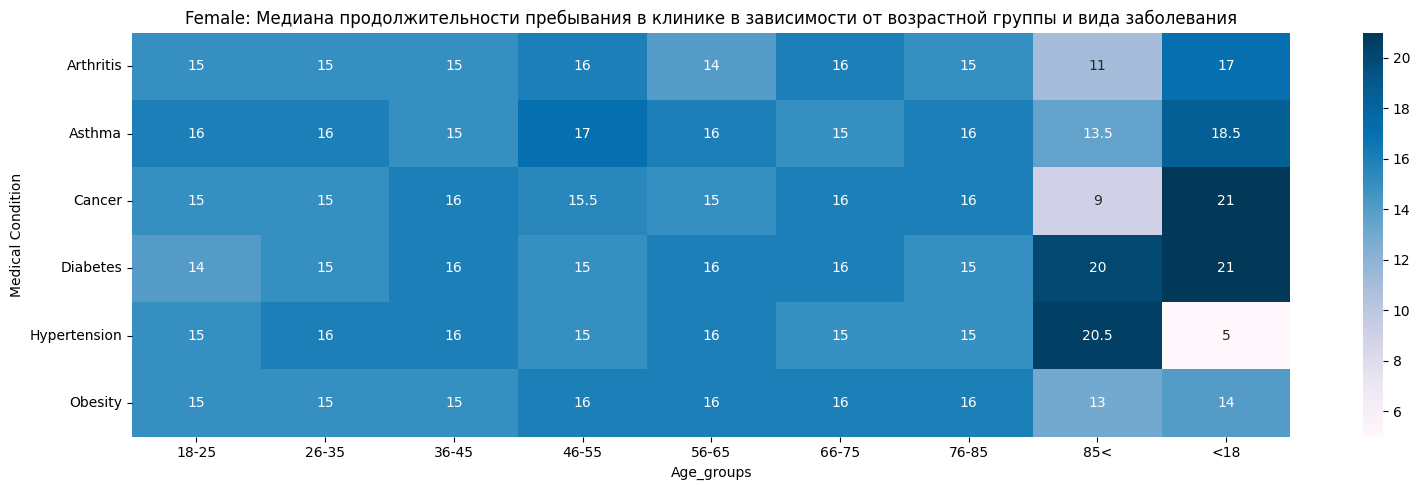

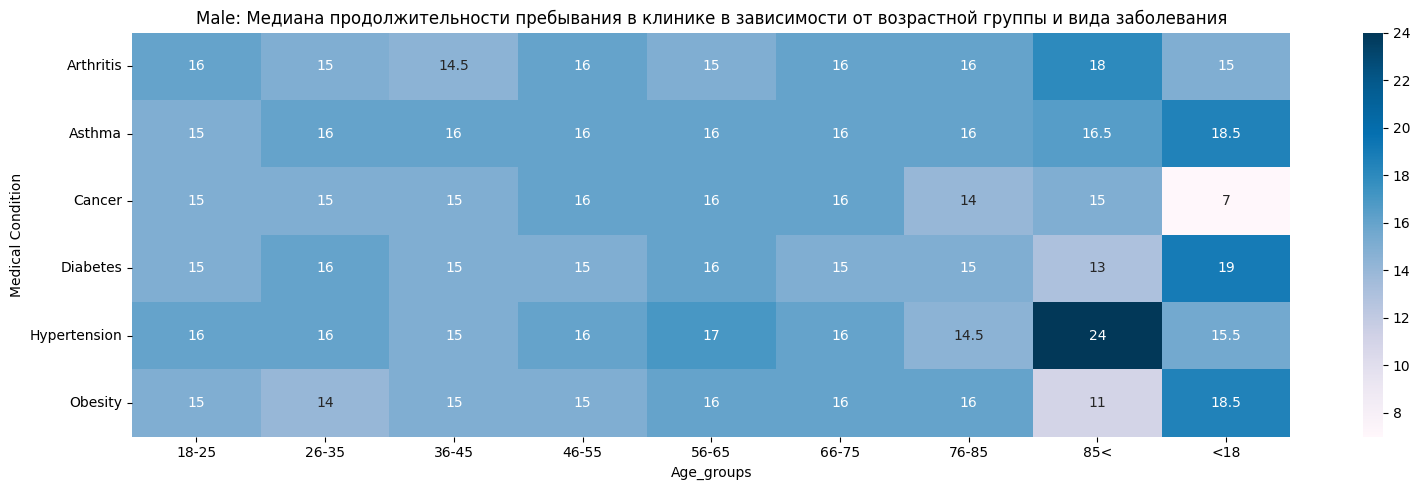

In [ ]:
#gender= list(df['Gender'].unique())

for x in gender:
  plt.figure(figsize=(16,5))
  sns.heatmap(
      pd.pivot_table(df[df['Gender']==x], values = 'treatment_period', columns = 'Age_groups', index = 'Medical Condition', aggfunc = "median"),
      annot=True,
      fmt='g',
      cmap = "PuBu"
      #cmap = sns.diverging_palette(240, 155, as_cmap=True)
      #cmap = sns.color_palette("coolwarm", as_cmap=True)
      #cmap = sns.color_palette("cubehelix", as_cmap=True)
      #cmap = sns.color_palette("magma", as_cmap=True)
      #cmap = sns.color_palette('pastel')
      )
  plt.title(f"{x}: Медиана продолжительности пребывания в клинике в зависимости от возрастной группы и вида заболевания")
  plt.tight_layout()
  plt.show()

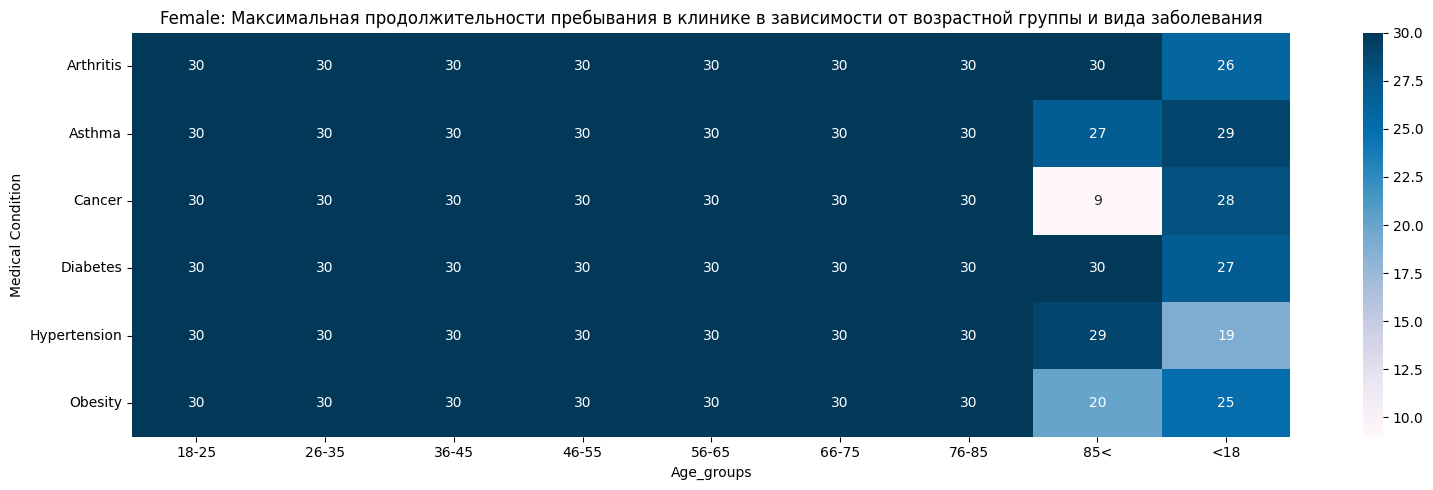

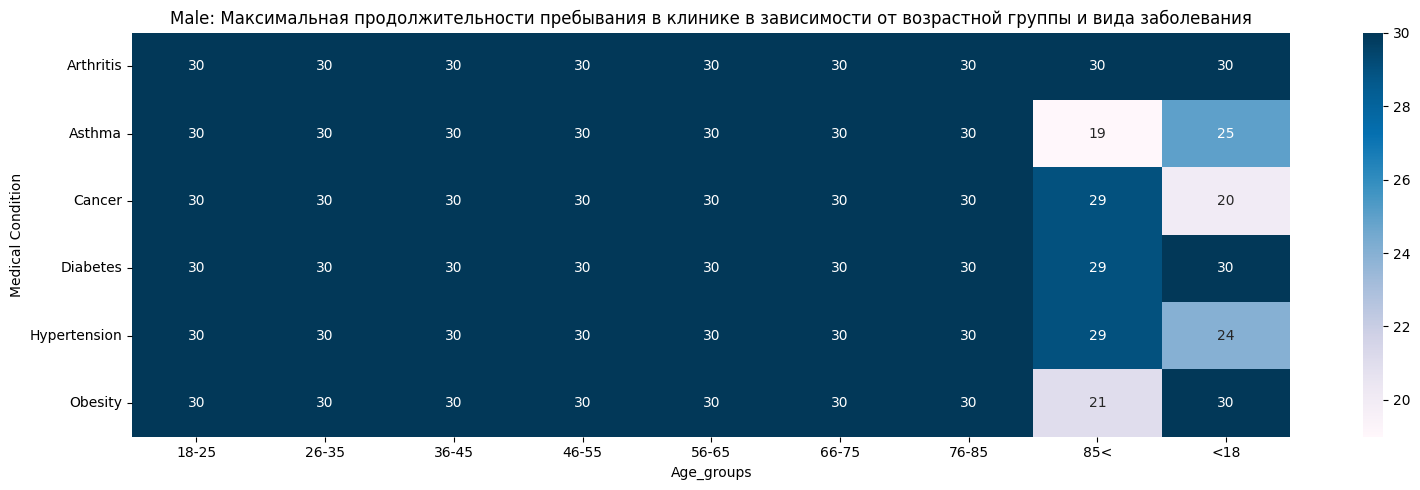

In [ ]:
#gender= list(df['Gender'].unique())

for x in gender:
  plt.figure(figsize=(16,5))
  sns.heatmap(
      pd.pivot_table(df[df['Gender']==x], values = 'treatment_period', columns = 'Age_groups', index = 'Medical Condition', aggfunc = "max"),
      annot=True,
      fmt='g',
      cmap = "PuBu"
      #cmap = sns.diverging_palette(240, 155, as_cmap=True)
      #cmap = sns.color_palette("coolwarm", as_cmap=True)
      #cmap = sns.color_palette("cubehelix", as_cmap=True)
      #cmap = sns.color_palette("magma", as_cmap=True)
      #cmap = sns.color_palette('pastel')
      )
  plt.title(f"{x}: Максимальная продолжительности пребывания в клинике в зависимости от возрастной группы и вида заболевания")
  plt.tight_layout()
  plt.show()

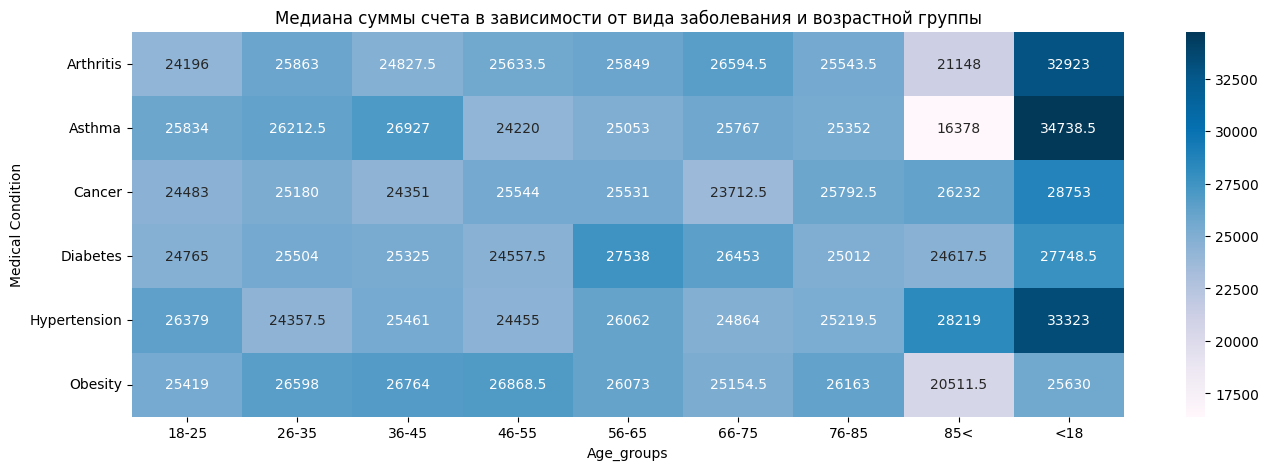

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(
    pd.pivot_table(df, values = 'Billing Amount', columns = df['Age_groups'], index = df['Medical Condition'], aggfunc = "median"),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    #cmap = sns.diverging_palette(240, 155, as_cmap=True)
    #cmap = sns.color_palette("coolwarm", as_cmap=True)
    #cmap = sns.color_palette("cubehelix", as_cmap=True)
    #cmap = sns.color_palette("magma", as_cmap=True)
    #cmap = sns.color_palette("Spectral", as_cmap=True)
    )
plt.title("Медиана суммы счета в зависимости от вида заболевания и возрастной группы")
plt.show()

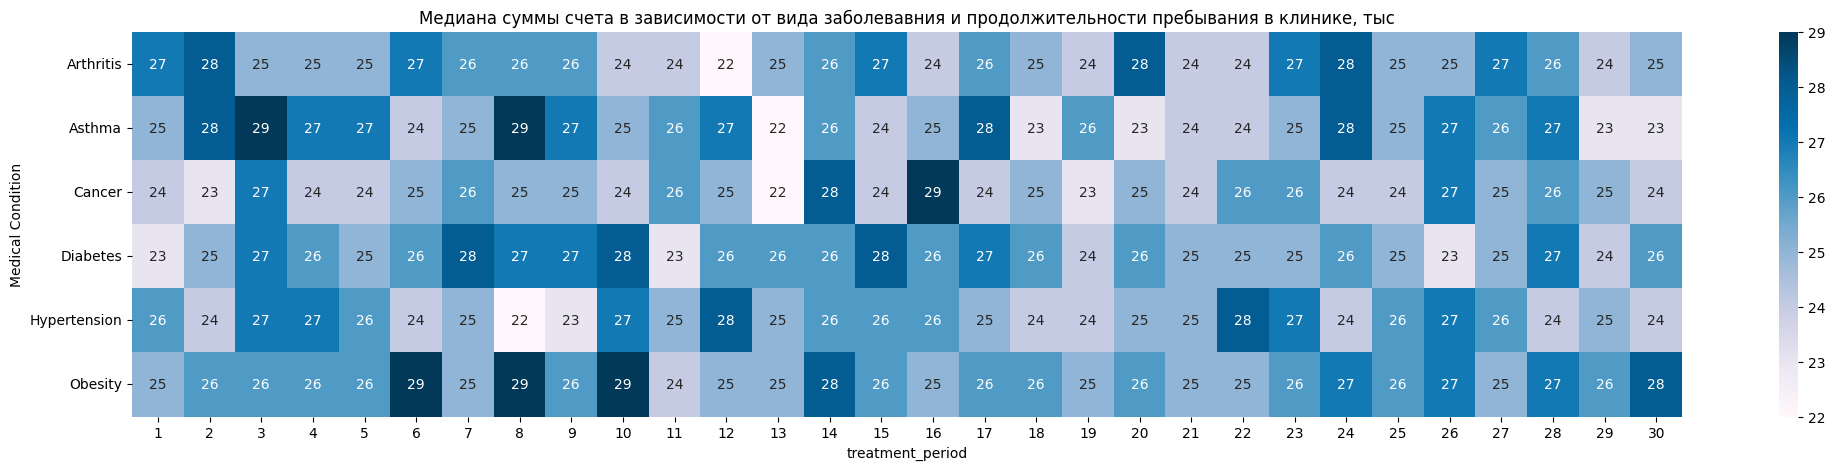

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(
    round(pd.pivot_table(df, values = 'Billing Amount', columns = df['treatment_period'], index = df['Medical Condition'], aggfunc = "median")/1000,0),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    )
plt.title("Медиана суммы счета в зависимости от вида заболевавния и продолжительности пребывания в клинике, тыс")
plt.show()

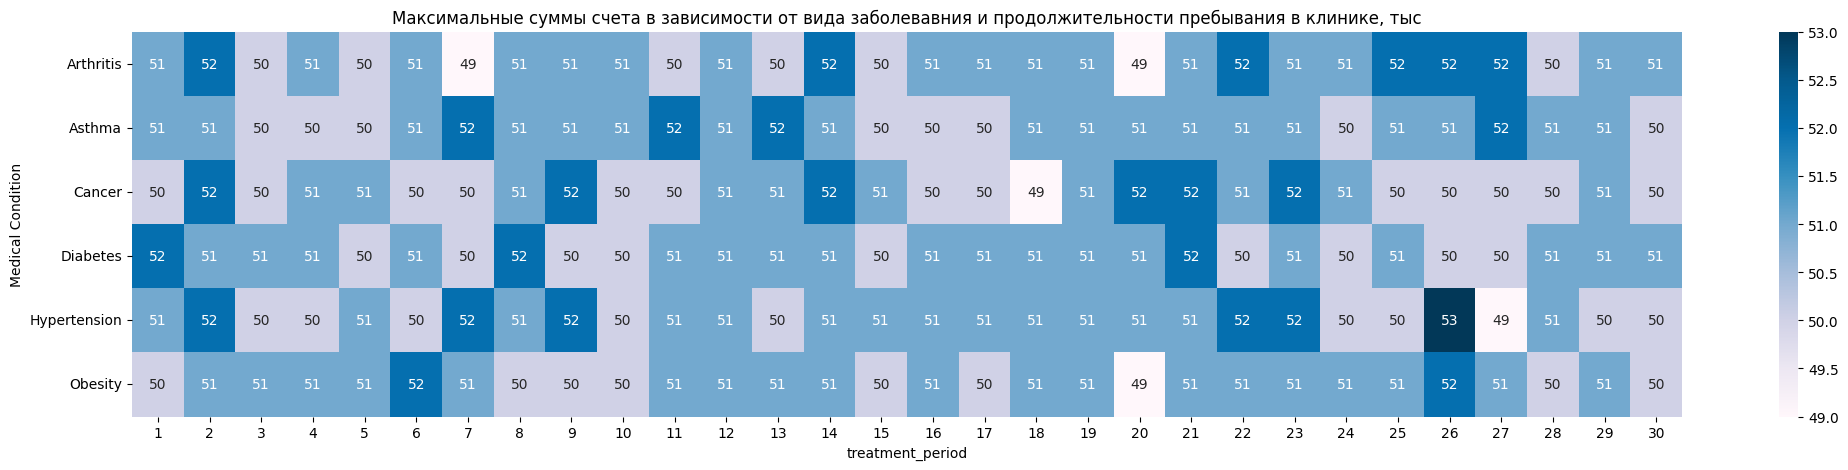

In [ ]:
plt.figure(figsize=(25,5))
sns.heatmap(
    round(pd.pivot_table(df, values = 'Billing Amount', columns = df['treatment_period'], index = df['Medical Condition'], aggfunc = "max")/1000,0),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    )
plt.title("Максимальные суммы счета в зависимости от вида заболевавния и продолжительности пребывания в клинике, тыс")
plt.show()

>> Судя по данным на представленной выше тепловой карте, нет сильной зависимости суммы счета с периодом пребывания в клинике и видом заболевания
---
Возможно, она сумма зависит от лекарств. Посмотрим

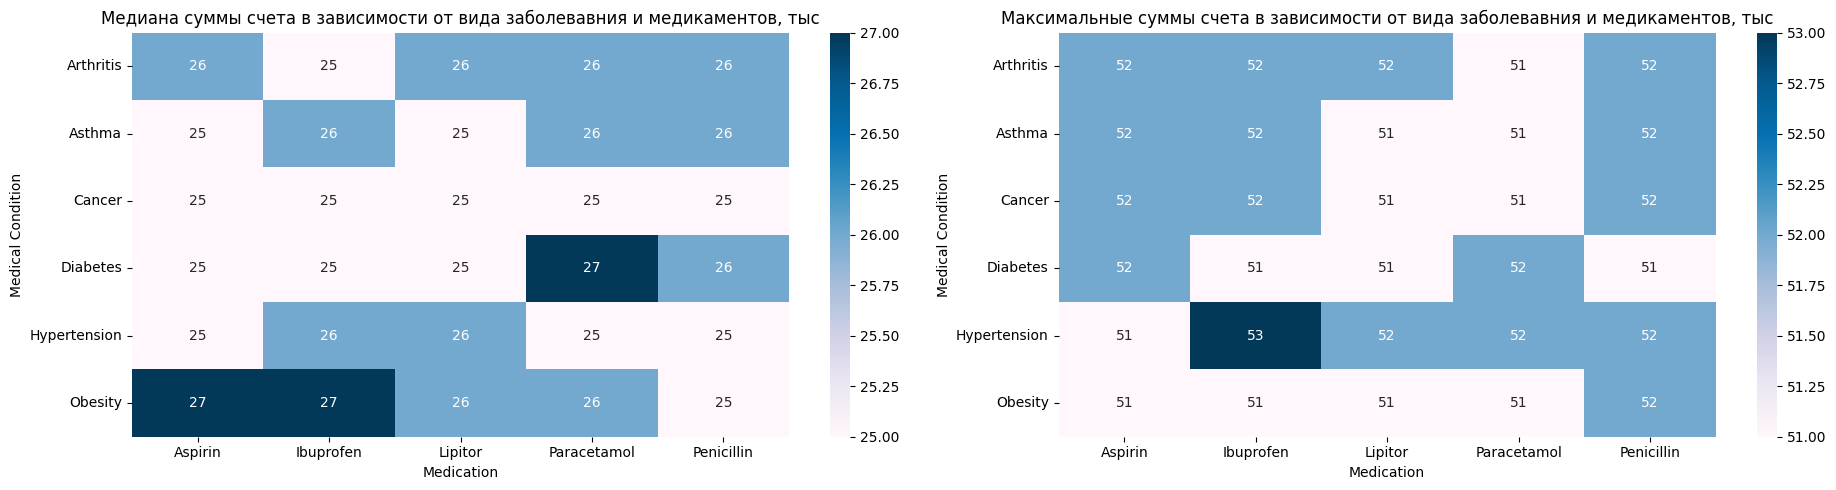

In [ ]:
plt.figure(figsize=(19,5))
plt.subplot(1,2,1)
sns.heatmap(
    round(pd.pivot_table(df, values = 'Billing Amount', columns = df['Medication'], index = df['Medical Condition'], aggfunc = "median")/1000,0),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    )
plt.title("Медиана суммы счета в зависимости от вида заболевавния и медикаментов, тыс")
plt.subplot(1,2,2)
sns.heatmap(
    round(pd.pivot_table(df, values = 'Billing Amount', columns = df['Medication'], index = df['Medical Condition'], aggfunc = "max")/1000,0),
    annot=True,
    fmt='g',
    cmap = "PuBu"
    )
plt.title("Максимальные суммы счета в зависимости от вида заболевавния и медикаментов, тыс")
plt.tight_layout()
plt.show()

>> **Посмотрм на данные в разбивке по страховым компаниям**

Кол-во счетов

In [ ]:
df['Insurance Provider'].value_counts()

,count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


Кол-во уникальных клиентов, Медианное значение счетов, максиммальное значение счетов в разбивке по страховым компаниям

In [ ]:
_pivot = pd.merge(pd.pivot_table(df, values = 'Billing Amount', index = 'Insurance Provider', aggfunc= ("median", "max")).reset_index(), \
         df[['Insurance Provider', 'Name']].groupby('Insurance Provider')['Name'].nunique().reset_index(),
         on = "Insurance Provider", how = "left")
_pivot

,Insurance Provider,max,median,Name
0,Aetna,52212,25786.0,9848
1,Blue Cross,52764,25595.0,10001
2,Cigna,52170,25545.0,10091
3,Medicare,52093,25592.5,10058
4,UnitedHealthcare,52373,25185.0,10002


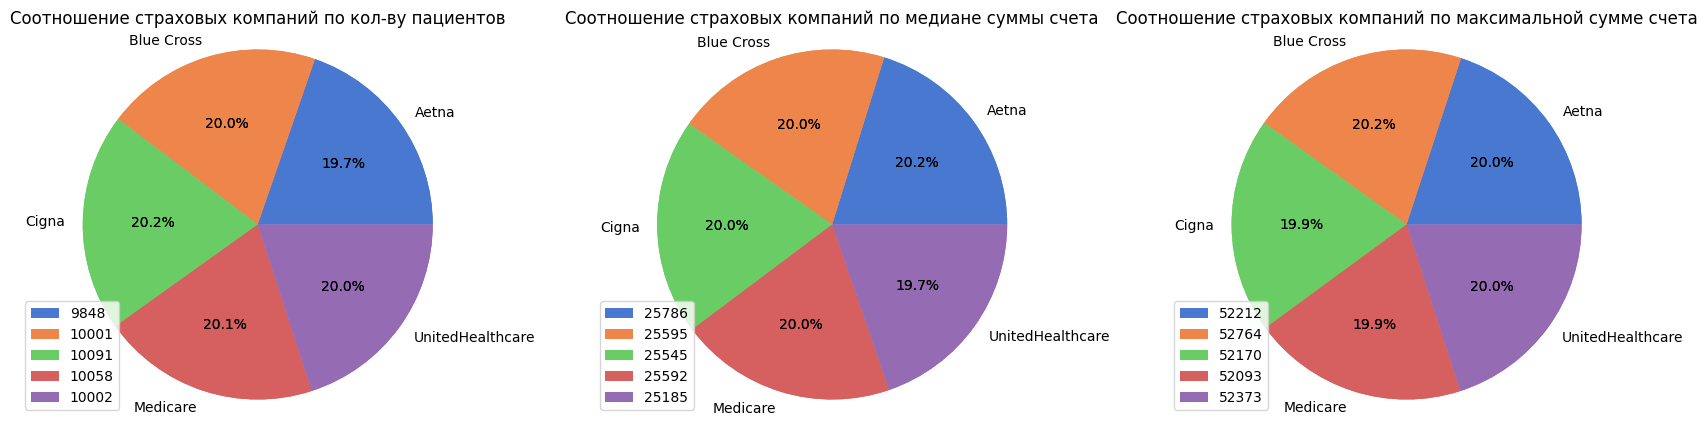

In [ ]:
#link to tips on additional visuals creation (incl.Sunburst) https://habr.com/ru/articles/502958/ , https://habr.com/ru/articles/468295/

fig, axes = plt.subplots(1,3)
fig.set_size_inches(21,5)

labels = _pivot['Insurance Provider']
colors = sns.color_palette("muted")  #('lightblue', 'pink', 'lightgreen', 'lightgrey', 'mediumseagreen')

#  по кол-ву пациентов
sizes = _pivot['Name']

axes[0].pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%')
patches, text, auto = axes[0].pie(sizes, colors = colors, autopct = '%1.1f%%')
axes[0].axis ('equal')
axes[0].legend (patches, sizes, loc = "lower left")
axes[0].set(title = "Соотношение страховых компаний по кол-ву пациентов")

#по медиане суммы счета
sizes1 = _pivot['median'].astype(int)

axes[1].pie(sizes1, colors = colors, labels = labels, autopct = '%1.1f%%')
patches, text, auto = axes[1].pie(sizes1, colors = colors, autopct = '%1.1f%%')
axes[1].axis ('equal')
axes[1].legend (patches, sizes1, loc = "lower left")
axes[1].set(title = "Соотношение страховых компаний по медиане суммы счета")

#по максимальной сумме счета
sizes2 = _pivot['max'].astype(int)

axes[2].pie(sizes2, colors = colors, labels = labels, autopct = '%1.1f%%')
patches, text, auto = axes[2].pie(sizes2, colors = colors, autopct = '%1.1f%%')
axes[2].axis ('equal')
axes[2].legend (patches, sizes2, loc = "lower left")
axes[2].set(title = "Соотношение страховых компаний по максимальной сумме счета")

fig.show()

>> Кол-во клиник, с которыми работает страховая:

In [ ]:
df.groupby(['Insurance Provider'])['Hospital'].nunique().reset_index()

,Insurance Provider,Hospital
0,Aetna,9022
1,Blue Cross,9131
2,Cigna,9217
3,Medicare,9224
4,UnitedHealthcare,9186


>> Данные в разрезе дней недели поступления пациентов

In [ ]:
df[['treatment_period','Billing Amount', 'Admission_Day_names']].groupby(['Admission_Day_names']).describe().T

Admission_Day_names           Friday        Monday      Saturday  \
treatment_period count   7892.000000   7866.000000   7901.000000   
                 mean      15.468702     15.424358     15.591697   
                 std        8.680207      8.656249      8.592864   
                 min        1.000000      1.000000      1.000000   
                 25%        8.000000      8.000000      8.000000   
                 50%       15.000000     15.000000     16.000000   
                 75%       23.000000     23.000000     23.000000   
                 max       30.000000     30.000000     30.000000   
Billing Amount   count   7892.000000   7866.000000   7901.000000   
                 mean   25581.355170  25654.008899  25628.507910   
                 std    14284.160600  14240.589845  14146.481799   
                 min    -1310.000000  -1317.000000  -1520.000000   
                 25%    13231.250000  13330.250000  13254.000000   
                 50%    25817.500000  25731.000000  25521.000000   
                 75%    37946.500000  37992.000000  37889.000000   
                 max    52764.000000  52102.000000  52373.000000   

Admission_Day_names           Sunday      Thursday       Tuesday     Wednesday  
treatment_period count   7920.000000   7989.000000   7982.000000   7950.000000  
                 mean      15.541667     15.498060     15.541468     15.496478  
                 std        8.730682      8.674764      8.624348      8.659705  
                 min        1.000000      1.000000      1.000000      1.000000  
                 25%        8.000000      8.000000      8.000000      8.000000  
                 50%       16.000000     15.000000     16.000000     15.000000  
                 75%       23.000000     23.000000     23.000000     23.000000  
                 max       30.000000     30.000000     30.000000     30.000000  
Billing Amount   count   7920.000000   7989.000000   7982.000000   7950.000000  
                 mean   25342.918687  25493.467893  25603.205963  25473.034088  
                 std    14143.587786  14153.348235  14350.735950  14162.631326  
                 min    -1660.000000  -2008.000000  -1016.000000  -1130.000000  
                 25%    13111.500000  13274.000000  13167.500000  13275.000000  
                 50%    25282.500000  25628.000000  25428.500000  25323.500000  
                 75%    37528.000000  37679.000000  38005.750000  37577.250000  
                 max    52170.000000  52154.000000  52212.000000  52182.000000

In [ ]:
# Кол-во уникальных пациентов поступивших по дням недели
df.groupby(['Admission_Day_names'])['Name'].nunique()

,Name
Admission_Day_names,
Friday,7138
Monday,7065
Saturday,7137
Sunday,7141
Thursday,7168
Tuesday,7160
Wednesday,7191


In [ ]:
# Кол-во неуникальных пациентов поступивших по дням недели
df.groupby(['Admission_Day_names'])['Name'].count().reset_index().sort_values(by = 'Name', ascending = False)

,Admission_Day_names,Name
4,Thursday,7989
5,Tuesday,7982
6,Wednesday,7950
3,Sunday,7920
2,Saturday,7901
0,Friday,7892
1,Monday,7866


In [ ]:
# Кол-во неуникальных пациентов поступивших по дням недели и годам
pd.pivot_table(df[['Admission_Day_names', 'Date of Admission', 'Name']], values='Name', columns= df['Date of Admission'].dt.to_period('Y'), index = 'Admission_Day_names', aggfunc = "count")

Date of Admission,2019,2020,2021,2022,2023,2024
Admission_Day_names,,,,,,
Friday,1007,1643,1556,1525,1629,532
Monday,1011,1599,1601,1542,1558,555
Saturday,1047,1559,1536,1601,1590,568
Sunday,1107,1586,1527,1562,1583,555
Thursday,1135,1686,1538,1584,1502,544
Tuesday,1055,1564,1590,1557,1647,569
Wednesday,1025,1648,1583,1646,1517,531


In [ ]:
# Кол-во неуникальных пациентов выписавшихся по дням недели
df.groupby(['Discharge_Day_names'])['Name'].count().reset_index().sort_values(by = 'Name', ascending = False)

,Discharge_Day_names,Name
4,Thursday,8029
0,Friday,8019
6,Wednesday,7970
3,Sunday,7926
2,Saturday,7895
1,Monday,7882
5,Tuesday,7779


>> Рассмотрим признак "Группа крови"

In [ ]:
pd.concat([
         df.groupby(['Blood Type'])['Name'].nunique().reset_index(),
         df[df['Gender']=='Female'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Gender']=='Male'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Cancer'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Obesity'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Diabetes'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Asthma'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Hypertension'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         df[df['Medical Condition']=='Arthritis'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1]
         #, df[df['Test Results']=='Normal'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         #df[df['Test Results']=='Abnormal'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1],
         #df[df['Test Results']=='Inconclusive'].groupby(['Blood Type'])['Name'].nunique().reset_index()[::1]
          ],
          axis = 1,
          keys = ['patients qty', 'female patients', 'male patients', 'Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis'] #,'Normal', 'Inconclusive', 'Abnormal']
         )

patients qty       female patients       male patients           Cancer  \
    Blood Type  Name      Blood Type  Name    Blood Type  Name Blood Type   
0           A+  6246              A+  3211            A+  3035         A+   
1           A-  6261              A-  3091            A-  3170         A-   
2          AB+  6291             AB+  3130           AB+  3161        AB+   
3          AB-  6259             AB-  3120           AB-  3139        AB-   
4           B+  6278              B+  3042            B+  3236         B+   
5           B-  6229              B-  3124            B-  3105         B-   
6           O+  6235              O+  3122            O+  3113         O+   
7           O-  6200              O-  3170            O-  3030         O-   

           Obesity         Diabetes           Asthma       Hypertension        \
   Name Blood Type  Name Blood Type  Name Blood Type  Name   Blood Type  Name   
0  1056         A+  1041         A+  1083         A+  1013           A+  1026   
1  1018         A-  1021         A-  1055         A-  1056           A-  1061   
2  1002        AB+  1035        AB+  1061        AB+  1071          AB+  1092   
3  1077        AB-  1036        AB-  1032        AB-  1018          AB-  1027   
4  1078         B+  1043         B+  1074         B+  1013           B+   993   
5  1017         B-  1068         B-  1029         B-  1008           B-  1044   
6  1006         O+  1015         O+  1044         O+  1041           O+  1047   
7  1040         O-  1033         O-  1006         O-  1052           O-  1029   

   Arthritis        
  Blood Type  Name  
0         A+  1027  
1         A-  1050  
2        AB+  1030  
3        AB-  1069  
4         B+  1077  
5         B-  1064  
6         O+  1082  
7         O-  1040